In [59]:
import pandas as pd
import numpy as np
import yfinance as yf

In [103]:
df = pd.read_csv("Discuss_comment_20220702.csv")
df = pd.read_csv("Discuss_comment.csv")

In [104]:
df.dropna(inplace=True)

In [61]:
df_merge = pd.concat([df, df1])

In [62]:
df_merge = df_merge.drop(columns = "Unnamed: 0")

In [63]:
df_merge.dropna(inplace=True)

In [64]:
df_merge

,Date,Topic,Comments
0,2022-06-09,老人院 - 22年後的終極告白,2000年12月1日那夜我們被迫走上絕路 《香港討論區》
1,2022-06-09,老人院 - 22年後的終極告白,收市 我輸爆光
2,2022-06-09,老人院 - 22年後的終極告白,輸爆光了
3,2022-06-09,老人院 - 22年後的終極告白,allined
4,2022-06-09,老人院 - 22年後的終極告白,乜事升咁多
...,...,...,...
1554,2022-07-09,中港美股指南針,如實紀錄實時交易情況，喜歡的，請俾個like 《香港討論區》
1555,2022-07-09,中港美股指南針,高沽A50，低揸美指
1556,2022-07-09,中港美股指南針,中國房住不炒，房屋不能再升值，資金被困住，想買股票也冇錢。\n所以A股必需沽空!
1557,2022-07-09,美股指南針,3000點遲早到，不過是2024年的事\n\n[ 本帖最後由 ying12345 於 202...


In [65]:
df_merge.to_csv("Discuss_comment_20220709.csv")

In [66]:
df = pd.read_csv("Discuss_comment_20220709.csv")

In [105]:
df

,Unnamed: 0,Date,Topic,Comments
0,11415,2022-07-10,美國經濟降溫！摩根資管︰聯儲局或後悔加息過急,通脹…一直居高不下，反而先係最危險！\n\r\n財長…及聯儲局長，都話會放棄市民，大手加息壓...
1,9579,2022-07-10,加拿大經濟大簫條,Screenshot_20220710_192818.jpg (728.82 KB)2...
2,9580,2022-07-10,加拿大經濟大簫條,因為最近好多老尾和老墨過嚟大温隊cocaine，所以生意好旺，連帶啲陀地港女都好搶手，道友多...
3,9581,2022-07-10,加拿大經濟大簫條,係大温呢喲真係超筍工，好多香港專業人仕，例如社工，財演都爭住做
4,9582,2022-07-10,加拿大經濟大簫條,中畀向威權統治\r\n那有民主
...,...,...,...,...
2017,36,2022-07-16,道指反彈658點 恆指會跟嗎？,https://news.tvb.com/tc/instant/ ... utm_mediu...
2018,35,2022-07-16,美期反彈；恒指IG試20400，金管局買入53.22億港元，阿里美股低港6.3%,因為仲未踢走軟銀
2019,34,2022-07-16,美期反彈；恒指IG試20400，金管局買入53.22億港元，阿里美股低港6.3%,又要等阿爺出實招，再吾減息，放水，就搞吾掂
2020,32,2022-07-16,美期反彈；恒指IG試20400，金管局買入53.22億港元，阿里美股低港6.3%,6月很多利好消息，抄高左，7月大陸就爆鑊


In [106]:
df["Date"] = pd.to_datetime(df["Date"])
# df["Topic"] = str(df["Topic"])
# df["Comments"] = str(df["Comments"])

In [107]:
positive = ["贏","升","fat","win","賺","tqqq","點會輸","點可能輸","邊有可能輸","牛市","開心","牛","lc","sp","做多","飛天","call", "數錢","up", "go", "moon", "富", "發達", "財自", "財務自由"]

In [108]:
negative = ["跌","大插","垃圾","sqqq","熊","摸頂","遠未見底","跳樓","自殺","插","二手飯","sc","lp","崩", "沽","溶斷","做淡", "空","down", "drop","輸", "窮", "破產", "股災"]

In [109]:
positive_score = 0
negative_score = 0

for index, row in df.iterrows():
    positive_score = 0
    negative_score = 0
    for word in positive:
        if word in df["Comments"][index]:
            positive_score += 1
        elif word in df["Topic"][index]:
            positive_score += 0.2
        df.loc[index, ("Positive_score")] = positive_score
    for word in negative:
        if word in df["Comments"][index]:
            negative_score += 1
        elif word in df["Topic"][index]:
            negative_score += 0.2
        df.loc[index, ("Negative_score")] = negative_score

In [110]:
df = df.set_index("Date")

In [111]:
df_active = df.resample("1d")["Comments"].count()

In [112]:
df_positive = df.resample("1d")['Positive_score'].sum()

In [113]:
df_negative = df.resample("1d")['Negative_score'].sum()

<AxesSubplot:xlabel='Date'>

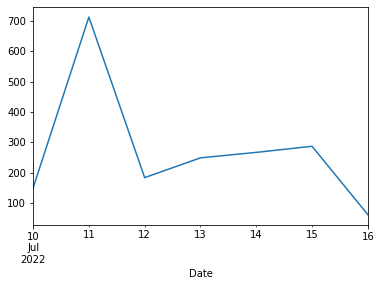

In [114]:
df_active.plot()

<AxesSubplot:xlabel='Date'>

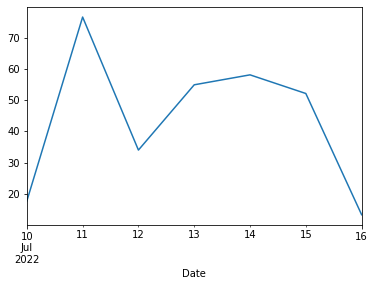

In [115]:
df_positive.plot()

<AxesSubplot:xlabel='Date'>

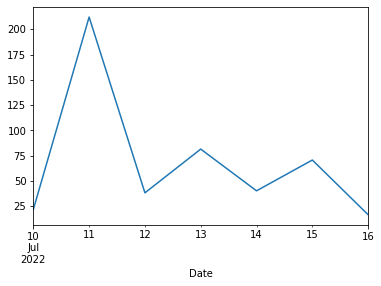

In [116]:
df_negative.plot()

In [101]:
df_active.to_csv("result_active.csv")

In [79]:
df_positive.to_csv("result_positive.csv")

In [80]:
df_negative.to_csv("result_negative.csv")

In [94]:
df = df.drop(columns = ["Unnamed: 0", "Topic", "Comments"], axis=1)

In [81]:
NQ_index = yf.download('qqq',start='2021-09-01',end='2022-06-18',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [82]:
NQ_index.index

DatetimeIndex(['2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
               '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10',
               '2021-09-13', '2021-09-14',
               ...
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)

In [96]:
df_merge = df.join(NQ_index, on="Date", how="left")

In [97]:
df_merge.to_csv("result_merge.csv")